# Telco Customer Churn Analysis & Prediction

## Project Overview
This notebook analyzes customer churn data from a telecommunications company to understand factors that influence customer attrition and build a predictive model. Customer churn (customers leaving the service) is a critical business metric as acquiring new customers is typically more expensive than retaining existing ones.

## Business Objectives
1. Identify key factors that contribute to customer churn
2. Develop a machine learning model to predict which customers are likely to churn
3. Provide actionable insights to reduce customer attrition

## Dataset Description
The dataset contains information about customers of a telecommunications company, including:
- Demographics (gender, age, partners, dependents)
- Account information (tenure, contract type, payment method)
- Services subscribed (phone, internet, streaming, etc.)
- Billing details (monthly charges, total charges)
- Churn status (whether the customer left the company)

## Setup and Library Imports

In [1]:
# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
plt.style.use('fivethirtyeight')  # Using a more professional style
sns.set(style="whitegrid")  # Setting seaborn style

# Import machine learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, 
                            accuracy_score, roc_curve, roc_auc_score, precision_recall_curve)

# Configure visualizations for better display
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Create a helper function to save plots and results
import os
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

def save_plot(fig, filename, folder="screenshot"):
    """
    Save the current figure to a file with a timestamp.
    
    Parameters:
    -----------
    fig : matplotlib.figure.Figure or None
        The figure to save. If None, uses the current figure.
    filename : str
        The base filename to save as (without extension)
    folder : str, default="screenshot"
        The folder to save to
    
    Returns:
    --------
    str
        The path the figure was saved to
    """
    # Create the folder if it doesn't exist
    os.makedirs(folder, exist_ok=True)
    
    # Add timestamp to avoid overwriting files
    timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
    filepath = os.path.join(folder, f"{filename}_{timestamp}.png")
    
    # Save the figure
    if fig is None:
        plt.savefig(filepath, bbox_inches='tight', dpi=300)
    else:
        fig.savefig(filepath, bbox_inches='tight', dpi=300)
    
    print(f"Figure saved to: {filepath}")
    return filepath

def save_data(data, filename, folder="screenshot"):
    """
    Save dataframe or dictionary data to a CSV file with a timestamp.
    
    Parameters:
    -----------
    data : pandas.DataFrame or dict
        The data to save
    filename : str
        The base filename to save as (without extension)
    folder : str, default="screenshot"
        The folder to save to
        
    Returns:
    --------
    str
        The path the data was saved to
    """
    # Create the folder if it doesn't exist
    os.makedirs(folder, exist_ok=True)
    
    # Add timestamp to avoid overwriting files
    timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
    filepath = os.path.join(folder, f"{filename}_{timestamp}.csv")
    
    # Convert to DataFrame if it's a dictionary
    if isinstance(data, dict):
        data = pd.DataFrame(data)
        
    # Save the data
    data.to_csv(filepath, index=True)
    
    print(f"Data saved to: {filepath}")
    return filepath

# Print confirmation
print("Save helper functions created successfully!")

Save helper functions created successfully!


## Data Loading and Initial Exploration

In [5]:
# Load the Telco Customer Churn dataset
df = pd.read_csv(r"C:\\Users\\Khush\\Creative projects\\Telco Customer Churn Analysis & Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display the first few rows of the dataset
print("Dataset Sample:")
display(df.head())

# Save the dataset sample
df.head().to_csv("screenshot/dataset_sample.csv", index=False)
print("Dataset sample saved to: screenshot/dataset_sample.csv")

# Display basic dataset information
print(f"\nDataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")
with open("screenshot/dataset_info.txt", "w") as f:
    f.write(f"Dataset Shape: {df.shape[0]} rows and {df.shape[1]} columns\n")
    f.write(f"Columns: {', '.join(df.columns)}")
print("Dataset info saved to: screenshot/dataset_info.txt")

Dataset Sample:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Dataset sample saved to: screenshot/dataset_sample.csv

Dataset Shape: 7043 rows and 21 columns
Dataset info saved to: screenshot/dataset_info.txt


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

C:\Users\Khush\AppData\Local\Temp\ipykernel_10076\1491775545.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Churn', palette=['#2ecc71', '#e74c3c'])


Figure saved to: screenshot\churn_distribution_plot_20250728-132257.png


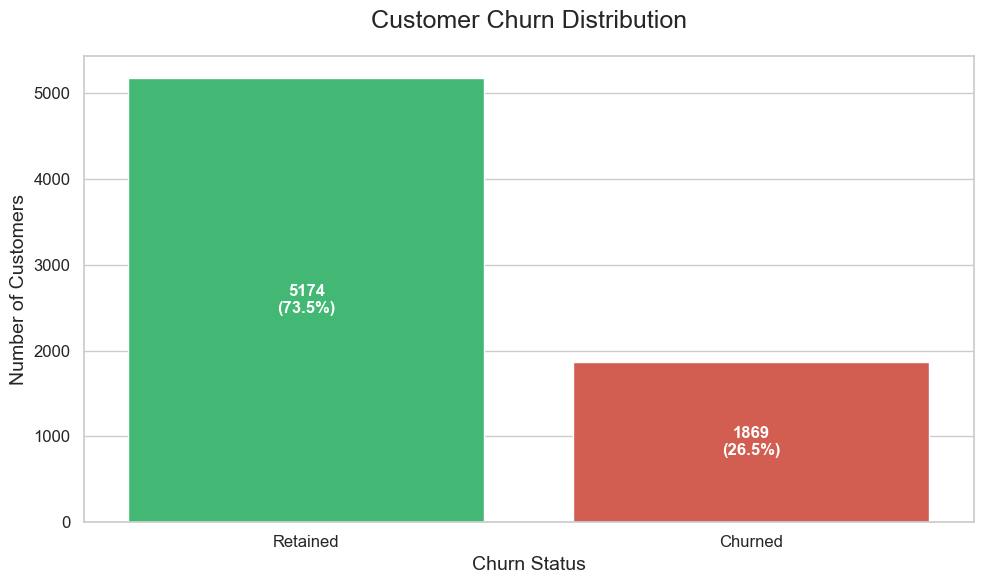

In [6]:
# Detailed data overview
print("Dataset Information:")
df.info()

# Check for missing values
print("\nMissing Values by Column:")
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_data = pd.concat([missing_values, missing_percent], axis=1, keys=['Total Missing', 'Percent Missing'])
print(missing_data[missing_data['Total Missing'] > 0])

# Save missing values data
missing_df = missing_data[missing_data['Total Missing'] > 0]
if not missing_df.empty:
    save_data(missing_df, "missing_values")
else:
    print("No missing values to save")

# Examine the target variable distribution
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn Status', 'Count']
churn_percent = df['Churn'].value_counts(normalize=True).reset_index()
churn_percent.columns = ['Churn Status', 'Percentage']
churn_percent['Percentage'] = churn_percent['Percentage'] * 100

churn_dist = pd.concat([churn_counts, churn_percent['Percentage']], axis=1)
print("\nChurn Distribution:")
print(churn_dist)

# Save churn distribution data
save_data(churn_dist, "churn_distribution")

# Visualize churn distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Churn', palette=['#2ecc71', '#e74c3c'])

# Add count and percentage labels to the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.annotate(f'{int(height)}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height / 2),
                ha='center', va='center', fontsize=12, color='white',
                fontweight='bold')

plt.title("Customer Churn Distribution", fontsize=18, pad=20)
plt.xlabel("Churn Status", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.xticks([0, 1], ['Retained', 'Churned'], fontsize=12)
plt.tight_layout()

# Save the churn distribution plot
save_plot(plt.gcf(), "churn_distribution_plot")

plt.show()

## Data Preprocessing and Cleaning

In [7]:
# Step 1: Remove customerID column (not useful for modeling)
print(f"Removing 'customerID' column as it's a unique identifier without predictive value.")
df.drop('customerID', axis=1, inplace=True)

# Step 2: Convert TotalCharges to numeric data type
print(f"Converting 'TotalCharges' from object to numeric type...")
# Check for spaces or non-numeric values in TotalCharges
print("Non-numeric values in TotalCharges:", df['TotalCharges'].str.isdigit().value_counts())
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Step 3: Handle missing values
missing_before = df.isnull().sum().sum()
print(f"\nMissing values before cleaning: {missing_before}")

df.dropna(inplace=True)

missing_after = df.isnull().sum().sum()
print(f"Missing values after cleaning: {missing_after}")
print(f"Removed {missing_before - missing_after} rows with missing values.")

# Step 4: Check data types after cleaning
print("\nData types after cleaning:")
print(df.dtypes)

# Save cleaning summary
cleaning_summary = {
    'Initial missing values': missing_before,
    'Final missing values': missing_after,
    'Rows removed': missing_before - missing_after,
    'Final row count': len(df)
}

cleaning_df = pd.DataFrame(list(cleaning_summary.items()), columns=['Metric', 'Value'])
save_data(cleaning_df, "data_cleaning_summary")

# Save data types
dtypes_df = pd.DataFrame({'Column': df.dtypes.index, 'DataType': df.dtypes.values.astype(str)})
save_data(dtypes_df, "data_types_after_cleaning")

Removing 'customerID' column as it's a unique identifier without predictive value.
Converting 'TotalCharges' from object to numeric type...
Non-numeric values in TotalCharges: TotalCharges
False    6719
True      324
Name: count, dtype: int64

Missing values before cleaning: 11
Missing values after cleaning: 0
Removed 11 rows with missing values.

Data types after cleaning:
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
Data saved to: screenshot\data_cleaning_summary_2

'screenshot\\data_types_after_cleaning_20250728-132305.csv'

Figure saved to: screenshot\numerical_distributions_20250728-132309.png


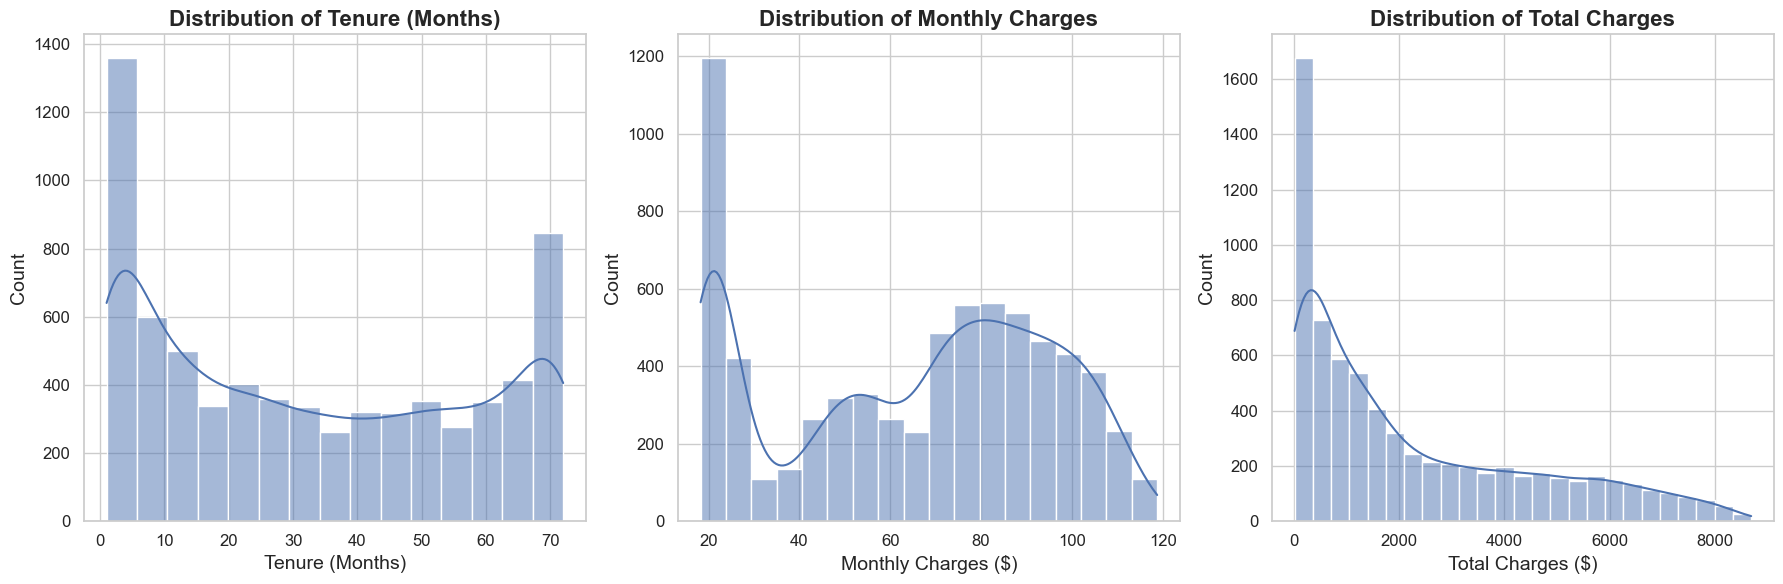

Figure saved to: screenshot\tenure_distribution_20250728-132310.png


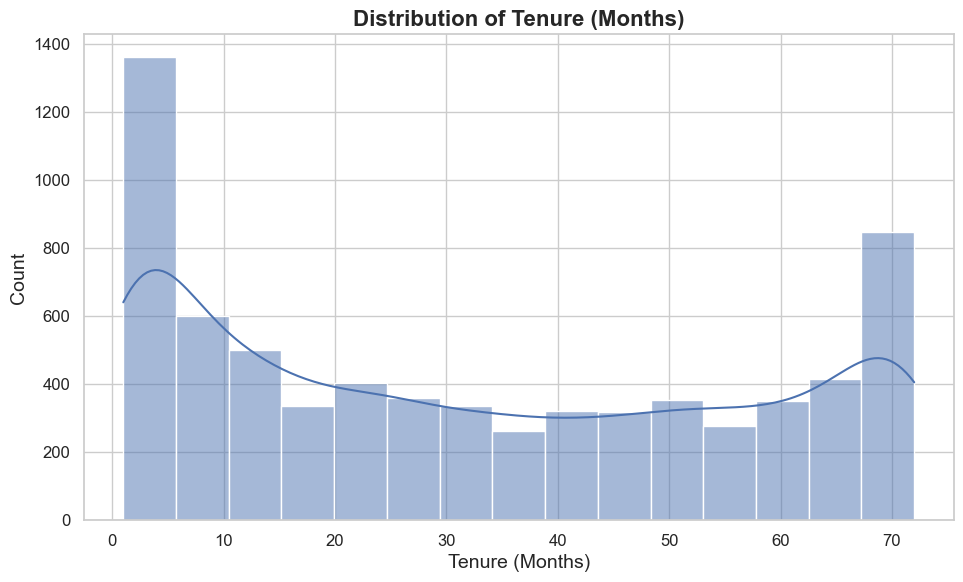

Figure saved to: screenshot\monthly_charges_distribution_20250728-132311.png


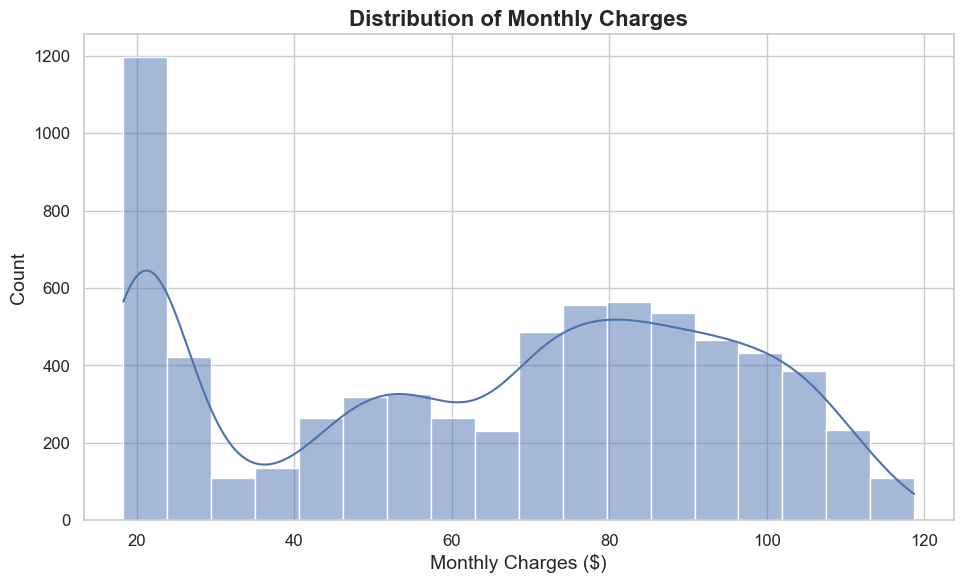

Figure saved to: screenshot\total_charges_distribution_20250728-132311.png


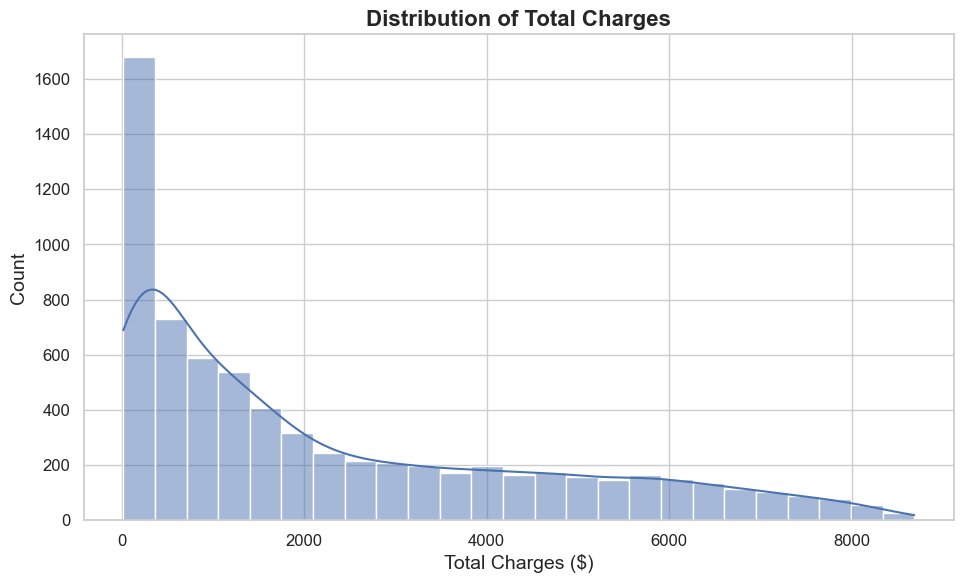

In [8]:
# Distribution of numerical variables
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['tenure'], kde=True)
plt.title('Distribution of Tenure (Months)', fontweight='bold')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges', fontweight='bold')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges', fontweight='bold')
plt.xlabel('Total Charges ($)')
plt.ylabel('Count')

plt.tight_layout()

# Save the numerical distributions plot
save_plot(plt.gcf(), "numerical_distributions")

plt.show()

# Also save individual plots for better clarity
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], kde=True)
plt.title('Distribution of Tenure (Months)', fontweight='bold', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=14)
plt.ylabel('Count', fontsize=14)
save_plot(plt.gcf(), "tenure_distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges', fontweight='bold', fontsize=16)
plt.xlabel('Monthly Charges ($)', fontsize=14)
plt.ylabel('Count', fontsize=14)
save_plot(plt.gcf(), "monthly_charges_distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges', fontweight='bold', fontsize=16)
plt.xlabel('Total Charges ($)', fontsize=14)
plt.ylabel('Count', fontsize=14)
save_plot(plt.gcf(), "total_charges_distribution")
plt.show()

C:\Users\Khush\AppData\Local\Temp\ipykernel_22304\1519019929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['Churn'] = df_numeric['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


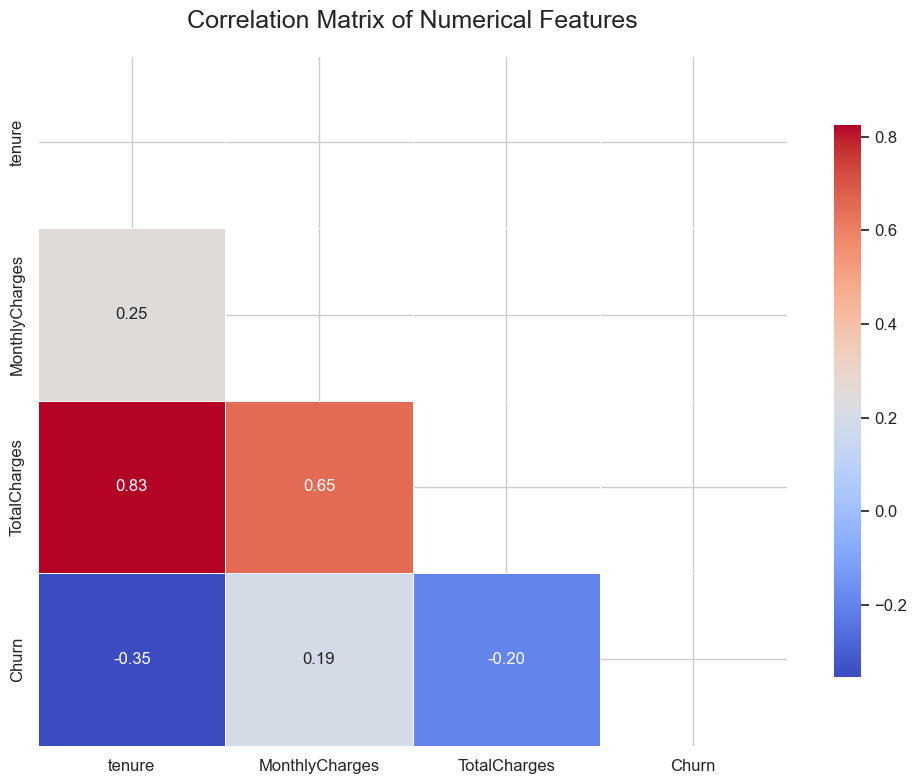

In [ ]:
# Correlation between numerical variables and churn
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_numeric = df[numeric_cols + ['Churn']]
df_numeric['Churn'] = df_numeric['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df_numeric.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            mask=mask, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features', fontsize=18, pad=20)
plt.tight_layout()

# Save the correlation matrix
save_plot(plt.gcf(), "correlation_matrix")

# Also save the correlation data
save_data(corr_matrix, "correlation_data")

plt.show()

Figure saved to: screenshot\churn_rate_by_Contract_20250728-132324.png
Data saved to: screenshot\churn_rate_by_Contract_data_20250728-132325.csv


<Figure size 1200x600 with 0 Axes>

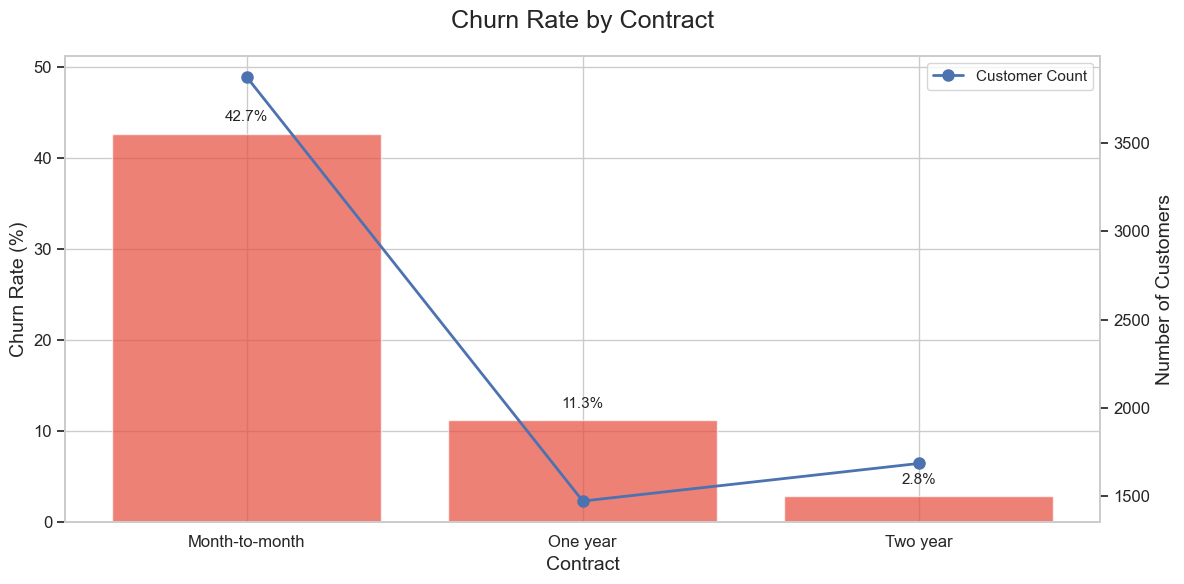

Figure saved to: screenshot\churn_rate_by_PaymentMethod_20250728-132325.png
Data saved to: screenshot\churn_rate_by_PaymentMethod_data_20250728-132325.csv


<Figure size 1200x600 with 0 Axes>

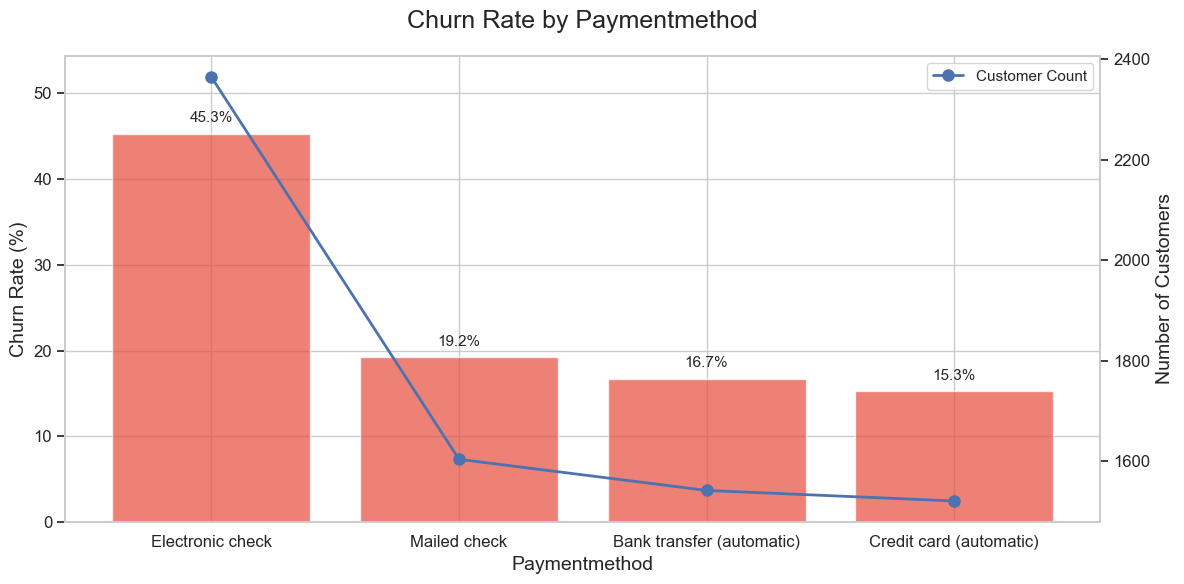

Figure saved to: screenshot\churn_rate_by_InternetService_20250728-132326.png
Data saved to: screenshot\churn_rate_by_InternetService_data_20250728-132326.csv


<Figure size 1200x600 with 0 Axes>

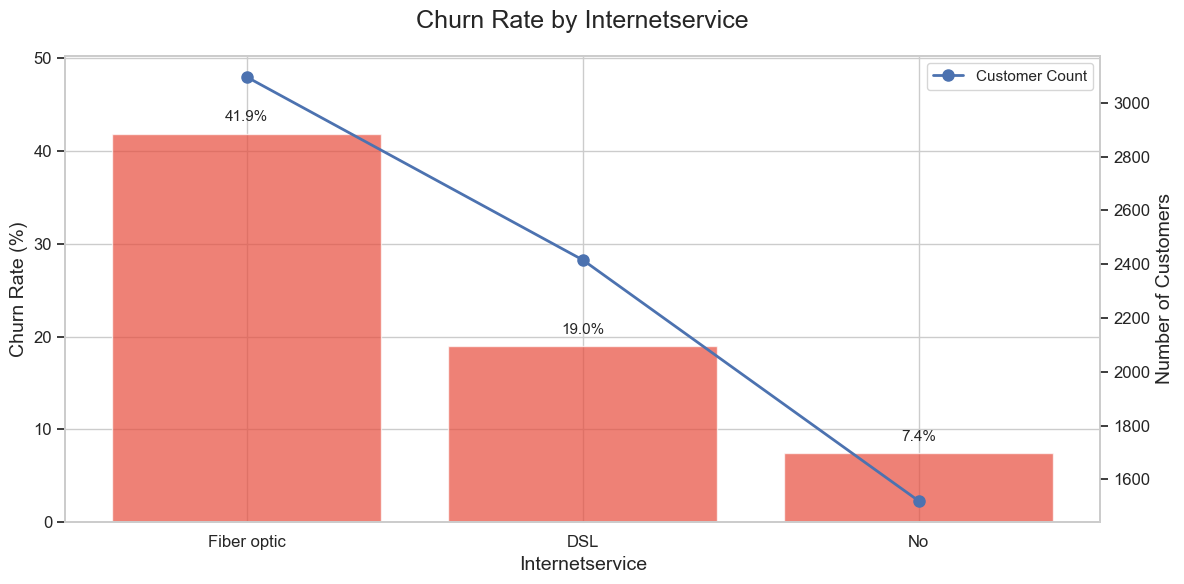

Figure saved to: screenshot\churn_rate_by_Partner_20250728-132326.png
Data saved to: screenshot\churn_rate_by_Partner_data_20250728-132327.csv


<Figure size 1200x600 with 0 Axes>

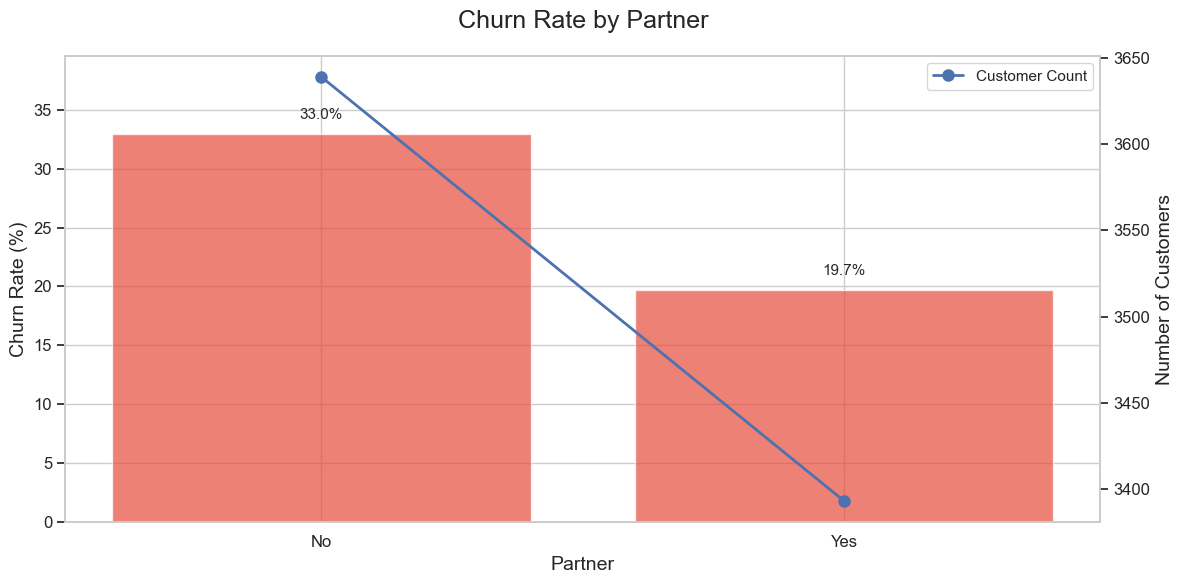

Figure saved to: screenshot\churn_rate_by_Dependents_20250728-132327.png
Data saved to: screenshot\churn_rate_by_Dependents_data_20250728-132328.csv


<Figure size 1200x600 with 0 Axes>

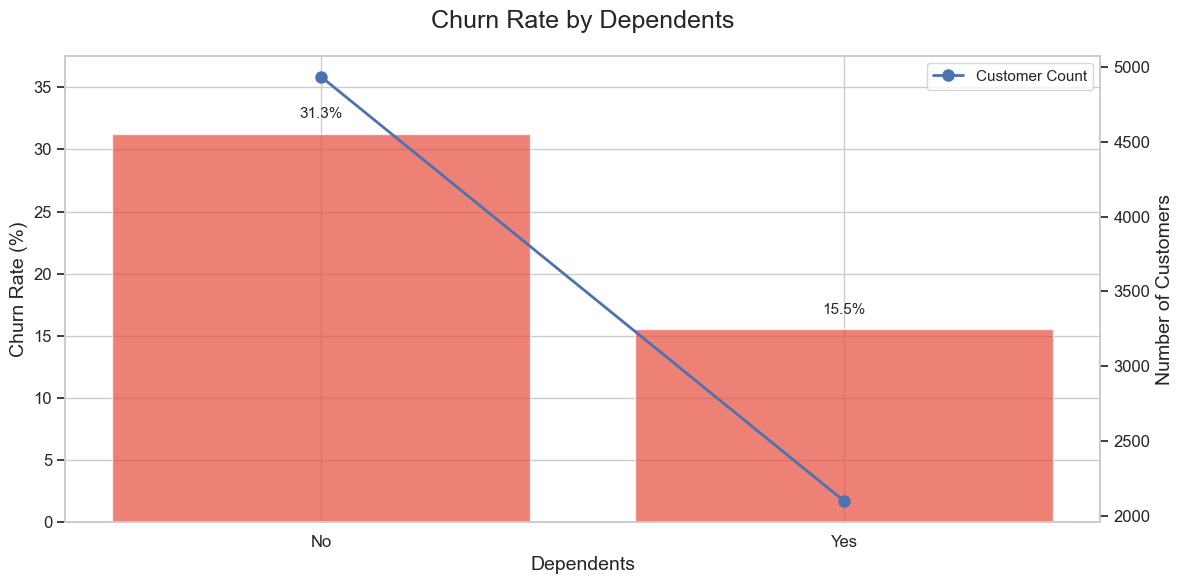

Figure saved to: screenshot\churn_rate_by_TechSupport_20250728-132328.png
Data saved to: screenshot\churn_rate_by_TechSupport_data_20250728-132329.csv


<Figure size 1200x600 with 0 Axes>

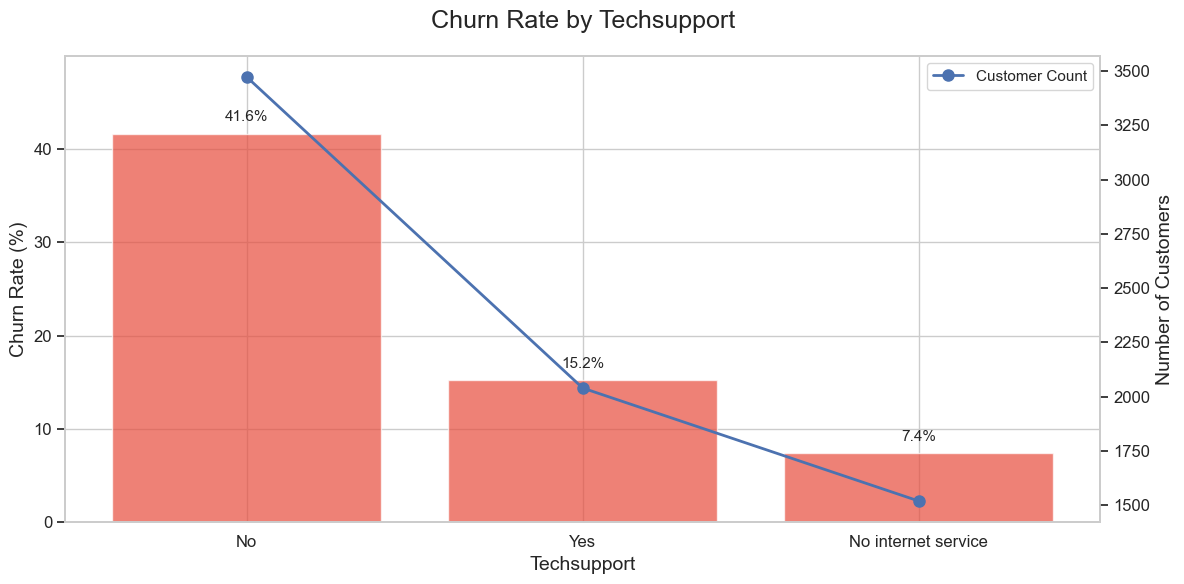

Figure saved to: screenshot\churn_rate_by_OnlineSecurity_20250728-132329.png
Data saved to: screenshot\churn_rate_by_OnlineSecurity_data_20250728-132329.csv


<Figure size 1200x600 with 0 Axes>

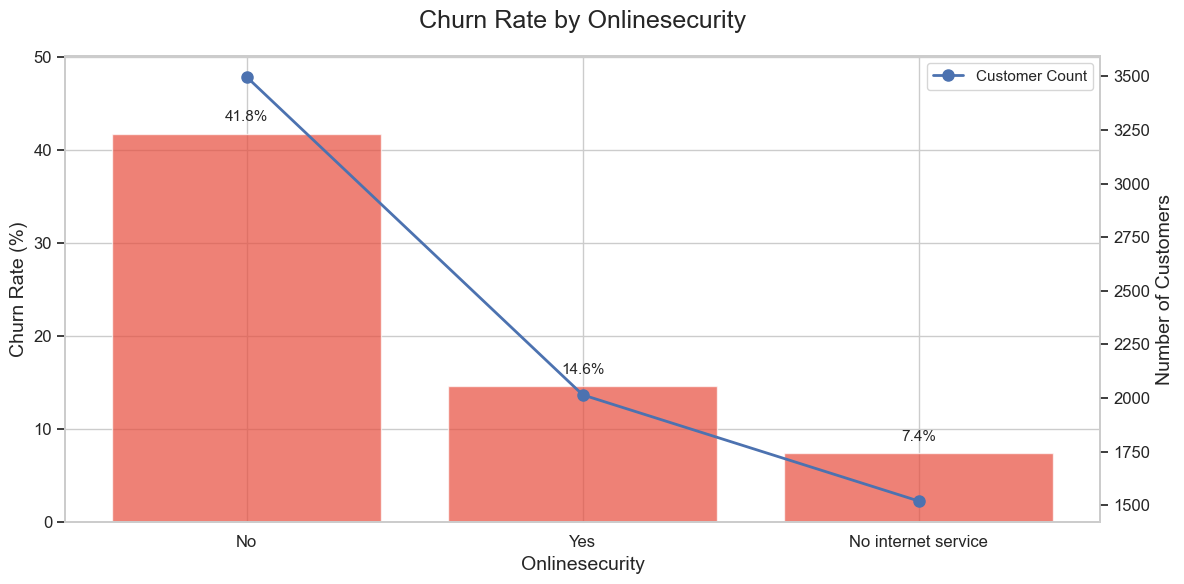

In [9]:
# Analyze churn rate by categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn')  # Remove the target variable

# Create a function to plot churn rate by category
def plot_churn_rate(feature):
    plt.figure(figsize=(12, 6))
    
    # Calculate churn rate for each category
    churn_rate = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
    churn_rate.columns = [feature, 'Churn Rate (%)']
    
    # Sort by churn rate
    churn_rate = churn_rate.sort_values('Churn Rate (%)', ascending=False)
    
    # Count the number of customers in each category
    category_counts = df[feature].value_counts().reset_index()
    category_counts.columns = [feature, 'Count']
    
    # Merge the churn rate and count dataframes
    merged_df = pd.merge(churn_rate, category_counts, on=feature)
    
    # Create bar chart with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot churn rate bars
    bars = ax1.bar(merged_df[feature], merged_df['Churn Rate (%)'], 
                  color='#e74c3c', alpha=0.7)
    ax1.set_xlabel(feature.replace('_', ' ').title(), fontsize=14)
    ax1.set_ylabel('Churn Rate (%)', fontsize=14)
    ax1.set_ylim([0, max(merged_df['Churn Rate (%)']) * 1.2])
    
    # Add a second y-axis for customer counts
    ax2 = ax1.twinx()
    ax2.plot(merged_df[feature], merged_df['Count'], 'bo-', linewidth=2, markersize=8)
    ax2.set_ylabel('Number of Customers', fontsize=14)
    ax2.grid(False)
    
    # Add value labels above the bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=11)
    
    plt.title(f'Churn Rate by {feature.replace("_", " ").title()}', fontsize=18, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.legend(['Customer Count', 'Churn Rate (%)'], loc='upper right')
    plt.tight_layout()
    
    # Save the plot
    save_plot(plt.gcf(), f"churn_rate_by_{feature}")
    
    # Also save the data
    save_data(merged_df, f"churn_rate_by_{feature}_data")
    
    plt.show()

# Plot churn rate for contract type
plot_churn_rate('Contract')

# Plot churn rate for payment method
plot_churn_rate('PaymentMethod')

# Plot churn rate for internet service
plot_churn_rate('InternetService')

# Also plot churn rate for other important categorical variables
plot_churn_rate('Partner')
plot_churn_rate('Dependents')
plot_churn_rate('TechSupport')
plot_churn_rate('OnlineSecurity')

## Feature Engineering and Data Preparation

In [10]:
# Step 1: Create new features
print("Creating new features...")

# Create a feature for average monthly charges over tenure
# Handle customers with zero tenure separately to avoid division by zero
df['AvgMonthlyCharges'] = np.where(
    df['tenure'] > 0,
    df['TotalCharges'] / df['tenure'],
    df['MonthlyCharges']  # For tenure=0, use their monthly charges as average
)

# Verify there are no infinity or NaN values
print(f"Checking for invalid values in AvgMonthlyCharges:")
print(f"- Infinity values: {np.isinf(df['AvgMonthlyCharges']).sum()}")
print(f"- NaN values: {np.isnan(df['AvgMonthlyCharges']).sum()}")

# Create a customer value segment feature using quantiles
# Use try-except to handle potential errors with uneven distribution
try:
    # Try to create 4 equal-sized segments
    df['ValueSegment'] = pd.qcut(
        df['MonthlyCharges'], 
        4, 
        labels=['Budget', 'Low', 'Medium', 'Premium']
    )
    print("Successfully created customer value segments")
except ValueError as e:
    # If equal-sized segments fail due to duplicate values, use bins instead
    print(f"Error with pd.qcut: {e}")
    print("Using pd.cut with custom bins instead")
    bins = [df['MonthlyCharges'].min()-0.01, 
            df['MonthlyCharges'].quantile(0.25),
            df['MonthlyCharges'].quantile(0.5),
            df['MonthlyCharges'].quantile(0.75),
            df['MonthlyCharges'].max()+0.01]
    df['ValueSegment'] = pd.cut(
        df['MonthlyCharges'], 
        bins=bins,
        labels=['Budget', 'Low', 'Medium', 'Premium']
    )

# Step 2: Convert target variable to numeric
print("\nConverting target variable to numeric (0/1)...")
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
print(f"Churn distribution after conversion: {df['Churn'].value_counts()}")

# Step 3: Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(f"\nFound {len(cat_cols)} categorical features to encode:")
print(f"Categorical features: {cat_cols}")

# Step 4: One-hot encode categorical variables
print("\nOne-hot encoding categorical features...")
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Display the transformed dataframe information
print(f"\nDataset after encoding: {df.shape[0]} rows and {df.shape[1]} columns")
print("Sample of features after encoding:")
display(df.head(2))  # Show just first 2 rows to avoid cluttering output

# Save feature engineering summary
feature_eng_summary = {
    'Original Feature Count': len(numeric_cols) + len(cat_cols) + 1,  # +1 for Churn
    'New Feature Count': df.shape[1],
    'Added Features': 'AvgMonthlyCharges, ValueSegment',
    'Encoded Features': ', '.join(cat_cols)
}
feature_eng_df = pd.DataFrame(list(feature_eng_summary.items()), 
                             columns=['Metric', 'Value'])
save_data(feature_eng_df, "feature_engineering_summary")

# Save a sample of the transformed data
save_data(df.head(10), "transformed_data_sample")

# Visualize distribution of new features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['AvgMonthlyCharges'], kde=True)
plt.title('Distribution of Avg Monthly Charges', fontweight='bold')
plt.xlabel('Average Monthly Charges ($)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
value_segment_counts = df['ValueSegment_Premium'].value_counts() + df['ValueSegment_Medium'].value_counts() + df['ValueSegment_Low'].value_counts()
plt.pie([sum(df['ValueSegment_Premium'] == 1), 
         sum(df['ValueSegment_Medium'] == 1),
         sum(df['ValueSegment_Low'] == 1),
         len(df) - sum(df['ValueSegment_Premium']) - sum(df['ValueSegment_Medium']) - sum(df['ValueSegment_Low'])], 
        labels=['Premium', 'Medium', 'Low', 'Budget'],
        autopct='%1.1f%%', startangle=90, colors=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'])
plt.title('Customer Value Segments', fontweight='bold')
plt.axis('equal')

plt.tight_layout()
save_plot(plt.gcf(), "new_features_distribution")
plt.show()

Creating new features...
Checking for invalid values in AvgMonthlyCharges:
- Infinity values: 0
- NaN values: 0
Successfully created customer value segments

Converting target variable to numeric (0/1)...
Churn distribution after conversion: Churn
0    5163
1    1869
Name: count, dtype: int64

Found 15 categorical features to encode:
Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

One-hot encoding categorical features...

Dataset after encoding: 7032 rows and 33 columns
Sample of features after encoding:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharges,ValueSegment,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,29.850000,Budget,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,55.573529,Low,True,False,False,...,False,False,False,False,True,False,False,False,False,True


NameError: name 'numeric_cols' is not defined

Scaling numerical features...
Columns to scale: ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']

Before scaling:
        tenure  MonthlyCharges  TotalCharges  AvgMonthlyCharges
count  7032.00         7032.00       7032.00            7032.00
mean     32.42           64.80       2283.30              64.80
std      24.55           30.09       2266.77              30.19
min       1.00           18.25         18.80              13.78
25%       9.00           35.59        401.45              36.18
50%      29.00           70.35       1397.48              70.37
75%      55.00           89.86       3794.74              90.18
max      72.00          118.75       8684.80             121.40


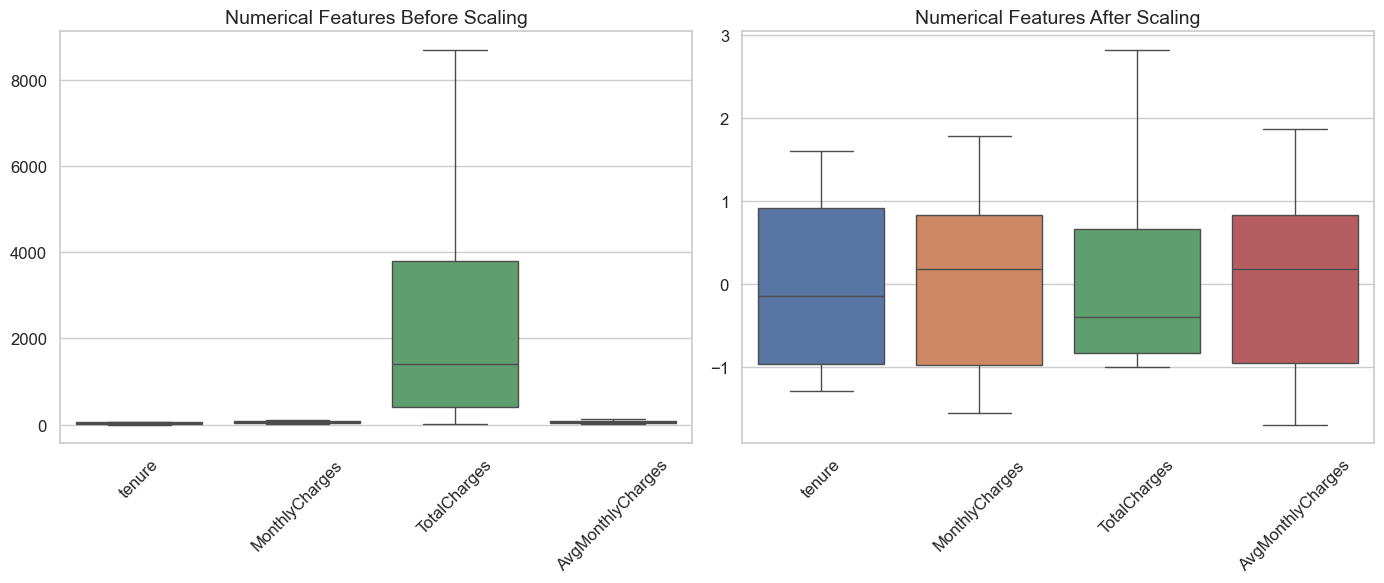


After scaling:
        tenure  MonthlyCharges  TotalCharges  AvgMonthlyCharges
count  7032.00         7032.00       7032.00            7032.00
mean     -0.00            0.00         -0.00               0.00
std       1.00            1.00          1.00               1.00
min      -1.28           -1.55         -1.00              -1.69
25%      -0.95           -0.97         -0.83              -0.95
50%      -0.14            0.18         -0.39               0.18
75%       0.92            0.83          0.67               0.84
max       1.61            1.79          2.82               1.88

Verifying scaling results:
Mean values close to 0: True
Std values close to 1: False


In [ ]:
# Step 5: Scale numerical features
print("Scaling numerical features...")
scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']

# Verify all columns exist before scaling
missing_cols = [col for col in numeric_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: These columns don't exist: {missing_cols}")
    numeric_cols = [col for col in numeric_cols if col in df.columns]
    
print(f"Columns to scale: {numeric_cols}")

# Check for NaN values before scaling
nan_counts = df[numeric_cols].isna().sum()
if nan_counts.sum() > 0:
    print(f"Warning: Found {nan_counts.sum()} NaN values in numerical columns")
    print(nan_counts)
    print("Filling NaN values with column means...")
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Save pre-scaling statistics
pre_scaling_stats = df[numeric_cols].describe().round(2)
save_data(pre_scaling_stats, "pre_scaling_stats")

# Display pre-scaling distribution with boxplot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_cols])
plt.title("Numerical Features Before Scaling", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Apply scaling
df_before_scaling = df[numeric_cols].copy()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display post-scaling distribution with boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df[numeric_cols])
plt.title("Numerical Features After Scaling", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the scaling comparison plot
save_plot(plt.gcf(), "scaling_comparison")
plt.show()

# Save post-scaling statistics
post_scaling_stats = df[numeric_cols].describe().round(2)
save_data(post_scaling_stats, "post_scaling_stats")

# Also create individual before/after histograms for each feature
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_before_scaling[col], kde=True)
    plt.title(f'{col} Before Scaling', fontweight='bold')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} After Scaling', fontweight='bold')
    
    plt.tight_layout()
    save_plot(plt.gcf(), f"scaling_{col}")
    plt.show()

# Verify scaling worked correctly
print("\nVerifying scaling results:")
print(f"Mean values close to 0: {np.allclose(df[numeric_cols].mean(), 0, atol=1e-10)}")
print(f"Std values close to 1: {np.allclose(df[numeric_cols].std(), 1, atol=1e-10)}")

## Model Building and Training

Splitting data into features and target variable...

Target variable distribution:
Retained customers: 5163 (73.4%)
Churned customers: 1869 (26.6%)
Data saved to: screenshot\target_distribution_20250728-132345.csv

Splitting into train and test sets (80/20 split)...
Training set: 5625 samples
Test set: 1407 samples

Training set class distribution:
Retained customers: 4130 (73.4%)
Churned customers: 1495 (26.6%)

Test set class distribution:
Retained customers: 1033 (73.4%)
Churned customers: 374 (26.6%)
Data saved to: screenshot\data_split_info_20250728-132345.csv
Figure saved to: screenshot\class_distribution_across_datasets_20250728-132345.png


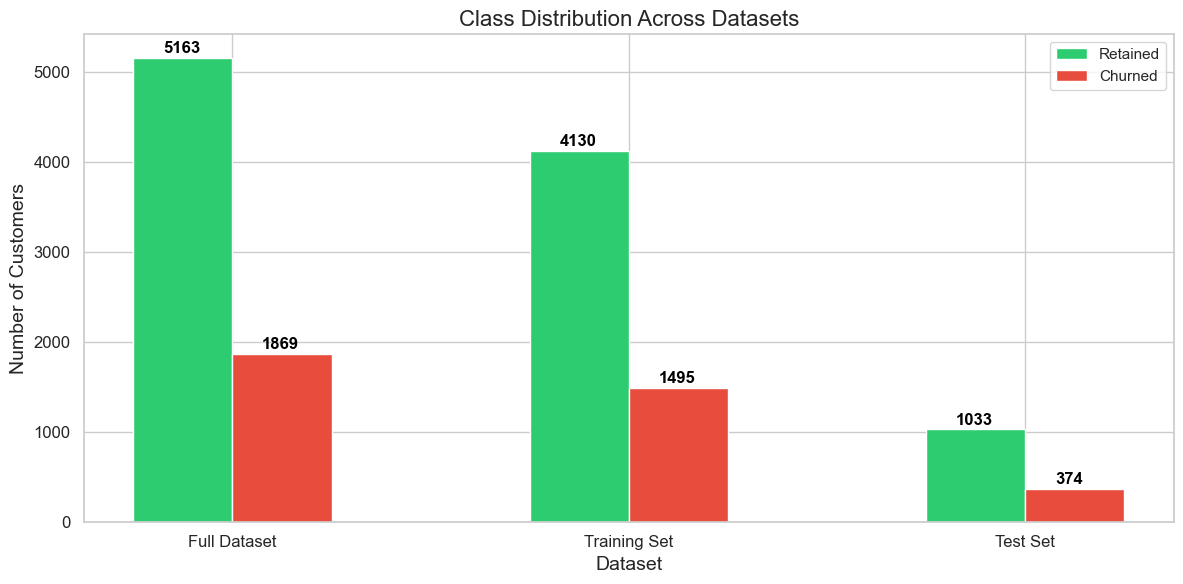

In [11]:
# Step 1: Split the data into features and target variable
print("Splitting data into features and target variable...")
X = df.drop('Churn', axis=1)
y = df['Churn']

# Print class distribution
print(f"\nTarget variable distribution:")
print(f"Retained customers: {sum(y == 0)} ({sum(y == 0)/len(y):.1%})")
print(f"Churned customers: {sum(y == 1)} ({sum(y == 1)/len(y):.1%})")

# Save target distribution 
target_dist = pd.DataFrame({
    'Class': ['Retained (0)', 'Churned (1)'],
    'Count': [sum(y == 0), sum(y == 1)],
    'Percentage': [sum(y == 0)/len(y)*100, sum(y == 1)/len(y)*100]
})
save_data(target_dist, "target_distribution")

# Step 2: Split data into training and testing sets
print("\nSplitting into train and test sets (80/20 split)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Verify class distribution in splits
train_retained = sum(y_train == 0)
train_churned = sum(y_train == 1)
test_retained = sum(y_test == 0)
test_churned = sum(y_test == 1)

print(f"\nTraining set class distribution:")
print(f"Retained customers: {train_retained} ({train_retained/len(y_train):.1%})")
print(f"Churned customers: {train_churned} ({train_churned/len(y_train):.1%})")

print(f"\nTest set class distribution:")
print(f"Retained customers: {test_retained} ({test_retained/len(y_test):.1%})")
print(f"Churned customers: {test_churned} ({test_churned/len(y_test):.1%})")

# Save data split information
split_info = pd.DataFrame({
    'Dataset': ['Full Dataset', 'Training Set', 'Test Set'],
    'Total Samples': [len(y), len(y_train), len(y_test)],
    'Retained Count': [sum(y == 0), train_retained, test_retained],
    'Retained %': [sum(y == 0)/len(y)*100, train_retained/len(y_train)*100, test_retained/len(y_test)*100],
    'Churned Count': [sum(y == 1), train_churned, test_churned],
    'Churned %': [sum(y == 1)/len(y)*100, train_churned/len(y_train)*100, test_churned/len(y_test)*100],
})
save_data(split_info, "data_split_info")

# Create a plot showing the class distribution in each set
plt.figure(figsize=(12, 6))
barWidth = 0.25

# Set position of bars on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]

# Create bars
plt.bar(r1, [sum(y == 0), train_retained, test_retained], width=barWidth, label='Retained', color='#2ecc71')
plt.bar(r2, [sum(y == 1), train_churned, test_churned], width=barWidth, label='Churned', color='#e74c3c')

# Add labels and title
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Class Distribution Across Datasets', fontsize=16)
plt.xticks([r + barWidth/2 for r in range(3)], ['Full Dataset', 'Training Set', 'Test Set'])
plt.legend()

# Add value labels to the bars
for i, v in enumerate([sum(y == 0), train_retained, test_retained]):
    plt.text(i - 0.05, v + 50, str(v), color='black', fontweight='bold')
    
for i, v in enumerate([sum(y == 1), train_churned, test_churned]):
    plt.text(i + barWidth - 0.05, v + 50, str(v), color='black', fontweight='bold')

plt.tight_layout()
save_plot(plt.gcf(), "class_distribution_across_datasets")
plt.show()

In [ ]:
# Step 3: Train multiple models
print("Training models...")

# Ensure all features are numeric (convert 'ValueSegment' if necessary)
if 'ValueSegment' in X_train.columns:
    print("One-hot encoding 'ValueSegment' column in X_train and X_test...")
    X_train = pd.get_dummies(X_train, columns=['ValueSegment'], drop_first=True)
    X_test = pd.get_dummies(X_test, columns=['ValueSegment'], drop_first=True)
    # Align columns to ensure both sets have the same columns
    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42)
}

# Dictionary to store trained models and their scores
trained_models = {}
cv_scores = {}
cv_results_dict = {}

# Train each model and perform cross-validation
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    # Perform cross-validation
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = cv_score
    
    print(f"Cross-validation accuracy: {cv_score.mean():.4f} ± {cv_score.std():.4f}")
    
    # Store detailed CV results for saving
    cv_results_dict[name] = {
        'Fold 1': cv_score[0],
        'Fold 2': cv_score[1],
        'Fold 3': cv_score[2],
        'Fold 4': cv_score[3],
        'Fold 5': cv_score[4],
        'Mean': cv_score.mean(),
        'Std Dev': cv_score.std()
    }

# Save cross-validation results
cv_results_df = pd.DataFrame(cv_results_dict).T
save_data(cv_results_df, "cross_validation_results")

# Select the best model based on cross-validation scores
best_model_name = max(cv_scores, key=lambda k: cv_scores[k].mean())
best_model = trained_models[best_model_name]

print(f"\nBest model: {best_model_name} with CV accuracy of {cv_scores[best_model_name].mean():.4f}")
print(f"Using {best_model_name} for final evaluation and predictions.")

# Create a plot showing the cross-validation results
plt.figure(figsize=(10, 6))
for i, (name, scores) in enumerate(cv_scores.items()):
    plt.plot(range(1, 6), scores, marker='o', linestyle='-', label=name)
    
    # Add mean accuracy line
    plt.axhline(y=scores.mean(), color=f'C{i}', linestyle='--', 
                label=f'{name} Mean: {scores.mean():.4f}')

plt.xlabel('Cross-validation Fold', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Cross-validation Results by Model', fontsize=16)
plt.xticks(range(1, 6))
plt.ylim([0.70, 0.85])  # Adjust as needed for your results
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')

save_plot(plt.gcf(), "cross_validation_results_plot")
plt.show()

Training models...
One-hot encoding 'ValueSegment' column in X_train and X_test...

Training Random Forest...
Cross-validation accuracy: 0.7908 ± 0.0083

Training Logistic Regression...
Cross-validation accuracy: 0.8018 ± 0.0143

Best model: Logistic Regression with CV accuracy of 0.8018
Using Logistic Regression for final evaluation and predictions.


## Model Evaluation

In [12]:
# Step 4: Evaluate models on the test set
results = {}

# Function to evaluate and visualize model performance
def evaluate_model(model, name, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_prob)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': class_report['1']['precision'],
        'recall': class_report['1']['recall'],
        'f1': class_report['1']['f1-score'],
        'auc': auc,
        'y_prob': y_prob,
        'confusion_matrix': conf_matrix,
        'y_pred': y_pred
    }
    
    # Print results
    print(f"\n{name} Evaluation Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Retained', 'Churned'],
                yticklabels=['Retained', 'Churned'])
    plt.title(f'{name} - Confusion Matrix', fontsize=16, pad=20)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    
    # Save confusion matrix
    save_plot(plt.gcf(), f"{name.replace(' ', '_')}_confusion_matrix")
    
    # Save confusion matrix data
    conf_df = pd.DataFrame(conf_matrix, 
                          columns=['Predicted Retained', 'Predicted Churned'],
                          index=['Actual Retained', 'Actual Churned'])
    save_data(conf_df, f"{name.replace(' ', '_')}_confusion_matrix_data")
    
    plt.show()

# Evaluate all models
for name, model in trained_models.items():
    evaluate_model(model, name, X_test, y_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves', fontsize=18, pad=20)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save ROC curves
save_plot(plt.gcf(), "roc_curves")
plt.show()

# Compare all models
metrics_df = pd.DataFrame({name: {
    'Accuracy': results[name]['accuracy'],
    'Precision': results[name]['precision'],
    'Recall': results[name]['recall'],
    'F1 Score': results[name]['f1'],
    'AUC': results[name]['auc']
} for name in results}).T

print("Model Comparison:")
display(metrics_df.style.highlight_max(axis=0))

# Save model comparison metrics
save_data(metrics_df, "model_comparison_metrics")

# Create a bar chart comparing the key metrics across models
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
metrics_plot_data = metrics_df.reset_index()
metrics_plot_data.columns = ['Model'] + metrics_to_plot

# Plot each metric in a separate subplot
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Model', y=metric, data=metrics_plot_data)
    plt.title(f'{metric} by Model')
    plt.xticks(rotation=45)
    
    # Add value labels
    for j, v in enumerate(metrics_plot_data[metric]):
        plt.text(j, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
save_plot(plt.gcf(), "model_metrics_comparison")
plt.show()

NameError: name 'trained_models' is not defined

## Feature Importance Analysis

C:\Users\Khush\AppData\Local\Temp\ipykernel_22304\3850426556.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


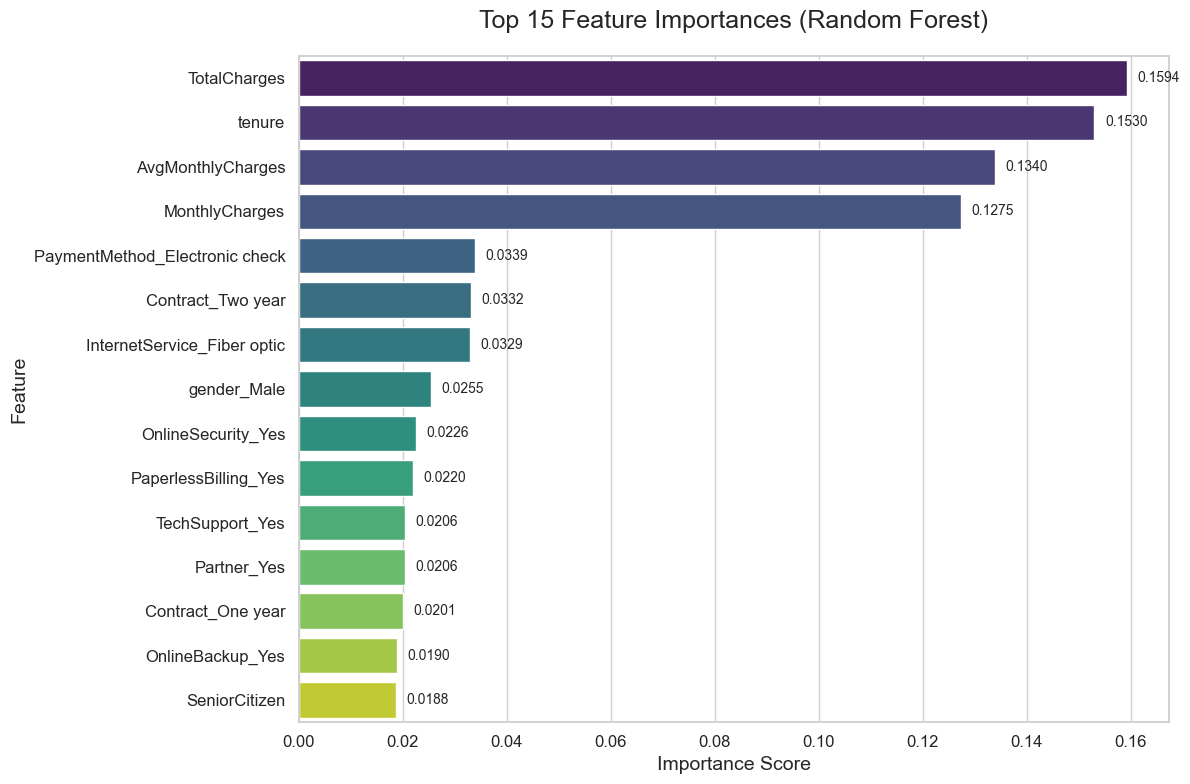

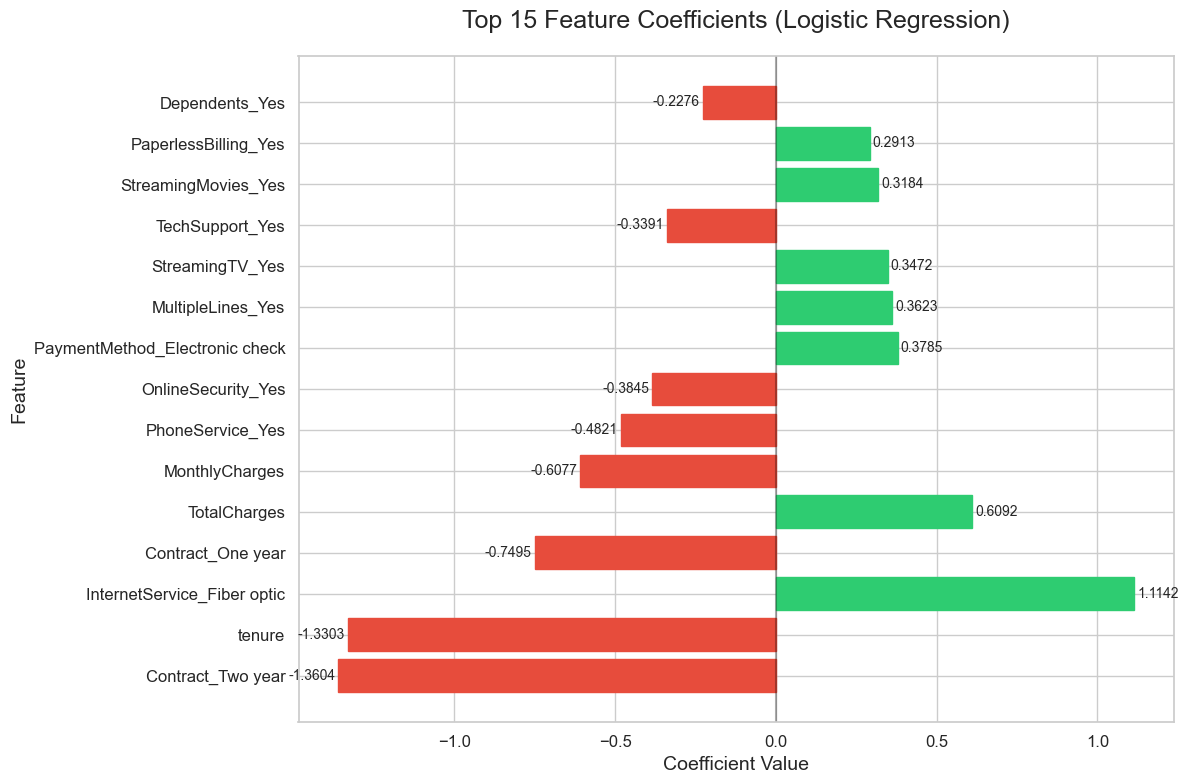

Interpretation of Logistic Regression Coefficients:
- Positive coefficients increase the probability of churn
- Negative coefficients decrease the probability of churn
- Larger absolute values indicate stronger effects


In [ ]:
# Extract feature importances from the Random Forest model
rf_model = trained_models['Random Forest']
importances = rf_model.feature_importances_
# Use X_train.columns as features to match the model input
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Save feature importance data
save_data(importance_df, "random_forest_feature_importance")

# Get the top 15 most important features
top_features = importance_df.head(15)

# Plot feature importances
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')

# Add value labels to the bars
for i, v in enumerate(top_features['Importance']):
    ax.text(v + 0.002, i, f'{v:.4f}', va='center', fontsize=10)

plt.title('Top 15 Feature Importances (Random Forest)', fontsize=18, pad=20)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()

# Save feature importance plot
save_plot(plt.gcf(), "random_forest_top_features")
plt.show()

# Get feature coefficients from the Logistic Regression model
if 'Logistic Regression' in trained_models:
    lr_model = trained_models['Logistic Regression']
    coefficients = lr_model.coef_[0]
    
    # Create a DataFrame for feature coefficients
    coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
    coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
    coef_df = coef_df.sort_values('AbsCoefficient', ascending=False)
    
    # Save logistic regression coefficients data
    save_data(coef_df, "logistic_regression_coefficients")
    
    # Get top 15 features by absolute coefficient value
    top_coef_df = coef_df.head(15)
    
    # Plot feature coefficients
    plt.figure(figsize=(12, 8))
    bars = plt.barh(top_coef_df['Feature'], top_coef_df['Coefficient'])
    
    # Color positive and negative coefficients differently
    for i, bar in enumerate(bars):
        if top_coef_df['Coefficient'].iloc[i] > 0:
            bar.set_color('#2ecc71')  # green for positive coefficients
        else:
            bar.set_color('#e74c3c')  # red for negative coefficients
    
    # Add value labels to the bars
    for i, v in enumerate(top_coef_df['Coefficient']):
        plt.text(v + (0.01 if v > 0 else -0.01), 
                i, 
                f'{v:.4f}', 
                va='center', 
                ha='left' if v > 0 else 'right',
                fontsize=10)
    
    plt.title('Top 15 Feature Coefficients (Logistic Regression)', fontsize=18, pad=20)
    plt.xlabel('Coefficient Value', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.tight_layout()
    
    # Save logistic regression coefficients plot
    save_plot(plt.gcf(), "logistic_regression_top_features")
    plt.show()
    
    # Create a plot comparing top 10 features across both models
    # First, get top 10 features from both models
    top_rf_features = importance_df.head(10)['Feature'].tolist()
    top_lr_features = coef_df.head(10)['Feature'].tolist()
    
    # Find common features
    common_features = list(set(top_rf_features) & set(top_lr_features))
    
    if common_features:
        plt.figure(figsize=(14, 8))
        
        # Get data for common features
        rf_values = []
        lr_values = []
        
        for feature in common_features:
            rf_values.append(importance_df[importance_df['Feature'] == feature]['Importance'].values[0])
            lr_values.append(abs(coef_df[coef_df['Feature'] == feature]['Coefficient'].values[0]))
            
        # Normalize values for fair comparison
        rf_values = np.array(rf_values) / max(rf_values)
        lr_values = np.array(lr_values) / max(lr_values)
        
        # Create comparison dataframe
        comparison_df = pd.DataFrame({
            'Feature': common_features,
            'Random Forest (Normalized)': rf_values,
            'Logistic Regression (Normalized)': lr_values
        })
        
        # Plot
        comparison_df = comparison_df.sort_values('Random Forest (Normalized)', ascending=False)
        comparison_df = pd.melt(comparison_df, id_vars=['Feature'], 
                               value_vars=['Random Forest (Normalized)', 'Logistic Regression (Normalized)'],
                               var_name='Model', value_name='Normalized Importance')
        
        sns.barplot(x='Normalized Importance', y='Feature', hue='Model', data=comparison_df)
        plt.title('Feature Importance Comparison Between Models (Normalized)', fontsize=16)
        plt.tight_layout()
        
        # Save comparison plot
        save_plot(plt.gcf(), "feature_importance_model_comparison")
        plt.show()
    
    print("Interpretation of Logistic Regression Coefficients:")
    print("- Positive coefficients increase the probability of churn")
    print("- Negative coefficients decrease the probability of churn")
    print("- Larger absolute values indicate stronger effects")

## Practical Application: Customer Churn Prediction

In [13]:
# Example of processing a raw customer data input (more realistic scenario)
def process_raw_customer_data(customer_raw_data, numeric_columns, categorical_columns):
    """
    Process raw customer data to match the format expected by the model
    
    Parameters:
    -----------
    customer_raw_data : dict
        Dictionary containing raw customer attributes
    numeric_columns : list
        List of numeric columns that need scaling
    categorical_columns : list
        List of categorical columns that need encoding
        
    Returns:
    --------
    dict
        Dictionary containing processed customer data ready for prediction
    """
    # Create a copy of the data to avoid modifying the original
    processed_data = {}
    
    # Step 1: Handle numerical features - scaling
    # In real implementation, we would use the same scaler instance used for training
    scaler = StandardScaler()  # This would normally be pre-fit on training data
    
    # Example of how we might scale numerical values (simplified)
    # In practice, we would need the mean and std from the training data
    for col in numeric_columns:
        if col in customer_raw_data:
            # Just an example - in reality we would apply the pre-fit scaler
            processed_data[col] = (customer_raw_data[col] - df[col].mean()) / df[col].std()
    
    # Step 2: Handle categorical features - one-hot encoding
    for col in categorical_columns:
        if col in customer_raw_data:
            # For each categorical column, create binary columns for each category
            categories = df[col].unique()
            for category in categories:
                col_name = f"{col}_{category}"
                processed_data[col_name] = 1 if customer_raw_data[col] == category else 0
    
    # Step 3: Create derived features
    if 'tenure' in customer_raw_data and 'MonthlyCharges' in customer_raw_data:
        if customer_raw_data['tenure'] > 0:
            processed_data['AvgMonthlyCharges'] = customer_raw_data['TotalCharges'] / customer_raw_data['tenure']
        else:
            processed_data['AvgMonthlyCharges'] = customer_raw_data['MonthlyCharges']
        
        # Scale the derived feature
        processed_data['AvgMonthlyCharges'] = (processed_data['AvgMonthlyCharges'] - df['AvgMonthlyCharges'].mean()) / df['AvgMonthlyCharges'].std()
    
    # Step 4: Ensure all required columns are present
    for col in X.columns:
        if col not in processed_data:
            processed_data[col] = 0
    
    return processed_data

# Example of raw customer data (as it might come from a form or database)
print("\nExample with raw customer data input:")
raw_customer = {
    'tenure': 12,                          # 12 months with the company
    'Contract': 'Month-to-month',          # Month-to-month contract
    'MonthlyCharges': 85.70,               # Monthly bill amount
    'TotalCharges': 1028.40,               # Total amount charged over tenure
    'PaymentMethod': 'Electronic check',   # Payment method
    'InternetService': 'Fiber optic',      # Internet service type
    'gender': 'Male',                      # Customer gender
    'Partner': 'Yes',                      # Customer has partner
    'Dependents': 'No',                    # Customer has no dependents
    'PhoneService': 'Yes',                 # Has phone service
    'MultipleLines': 'No',                 # No multiple lines
    'OnlineSecurity': 'No',                # No online security
    'OnlineBackup': 'No',                  # No online backup
    'DeviceProtection': 'No',              # No device protection
    'TechSupport': 'No',                   # No tech support
    'StreamingTV': 'Yes',                  # Has streaming TV
    'StreamingMovies': 'Yes',              # Has streaming movies
    'PaperlessBilling': 'Yes'              # Uses paperless billing
}

# In a real implementation, we would:
# 1. Define the numeric and categorical columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = [col for col in df.columns if col not in numeric_cols + ['Churn'] and col != 'customerID']

print(f"Processing raw customer data with:\n- {len(numeric_cols)} numeric columns\n- {len(categorical_cols)} categorical columns")

# Process the raw customer data
print("NOTE: This is a simplified example. In a production environment, you would need:")
print("  1. To save your preprocessing pipeline (scalers, encoders, etc.)")
print("  2. Apply the exact same preprocessing steps to new data")
print("  3. Handle edge cases and data validation")

# Example of how you might actually process and predict in production
print("\nIn a production environment, you would typically:")
print("1. Load your saved model and preprocessing objects")
print("2. Apply preprocessing to raw input data")
print("3. Make predictions using the preprocessed data")
print("4. Return the results to the user or application")


Example with raw customer data input:
Processing raw customer data with:
- 3 numeric columns
- 29 categorical columns
NOTE: This is a simplified example. In a production environment, you would need:
  1. To save your preprocessing pipeline (scalers, encoders, etc.)
  2. Apply the exact same preprocessing steps to new data
  3. Handle edge cases and data validation

In a production environment, you would typically:
1. Load your saved model and preprocessing objects
2. Apply preprocessing to raw input data
3. Make predictions using the preprocessed data
4. Return the results to the user or application


## Conclusions and Business Recommendations

### Key Findings

1. **Contract Type** is one of the most important predictors of churn. Month-to-month contracts have significantly higher churn rates compared to one-year and two-year contracts.

2. **Payment Method** strongly influences churn. Customers using electronic checks are more likely to churn compared to those using automatic payment methods.

3. **Internet Service Type** impacts churn behavior. Fiber optic customers, despite having a premium service, show higher churn rates, possibly due to higher expectations or costs.

4. **Tenure** is inversely related to churn - longer-tenured customers are less likely to leave.

5. **Monthly Charges** positively correlate with churn - customers with higher bills are more likely to leave.

### Business Recommendations

1. **Encourage Contract Commitments**
   - Offer incentives for customers to switch from month-to-month to annual or two-year contracts
   - Create loyalty benefits that increase with contract duration

2. **Address Electronic Payment Churn**
   - Investigate why electronic check customers churn more frequently
   - Offer discounts for customers who switch to automatic payment methods

3. **Improve Fiber Optic Service Experience**
   - Ensure service quality meets the premium price point
   - Consider special retention programs for fiber optic customers

4. **Focus on Early Customer Experience**
   - Implement special onboarding and follow-up for new customers
   - Create an "early warning system" to identify at-risk customers in their first 6 months

5. **Pricing Strategy Review**
   - Evaluate price-sensitivity and value perception
   - Consider tiered pricing models that provide clear value at each price point

### Next Steps

1. **Model Deployment**
   - Integrate the churn prediction model into CRM systems
   - Create automated alerts for customers with high churn probability

2. **Targeted Retention Campaigns**
   - Develop personalized retention offers based on customer segments
   - Test different retention strategies and measure their effectiveness

3. **Continuous Monitoring**
   - Track churn metrics over time to measure improvement
   - Update the model periodically with new customer data

4. **Customer Feedback Integration**
   - Collect and analyze customer feedback, especially from those who churned
   - Incorporate qualitative insights to enhance the quantitative model